# Information
#### Paper: 
- Destruction Perfected, István A. Kovács & Albert-László Barabási
- https://www.nature.com/articles/524038a

#### Due Date:
- 30/05/19, 11:59pm

#### Students:
- Samuel De La Motte (21720063)
- Fraser Bullock (21299527)
- Eugene Lee (20816466)

# Introduction

This Jupyter Notebook looks at the paper entitled “Destruction Perfected” by István A. Kovács and Albert-László Barabási, published in the Nature vol. 524. The authors discuss a method proposed by Morone and Makse [2] that can dismantle networks that have a locally tree-like structure in an effective manner, by identifying a set of influencer nodes to be completely removed from the network, known as the ‘Collective Influence’ algorithm. In this notebook we test to see if we can replicate the results discussed in the paper, and test to see if collective influence can be used effectively on real world networks that don’t appear to have a locally tree-like structure.

The need for an algorithm that can achieve this ‘destruction’ of large networks efficiently, is increasingly prevalent in today’s society.

“Consider for example, the need to eliminate bacteria by disrupting their molecular network or by vaccinating a few individuals in a population to break up the contact network through which a pathogen spreads” [1].

There are a significant amount of real world applications for an algorithm that can perform calculations in real time on large datasets. Not only are these algorithms useful in determining which nodes to remove from a network, but also the ability to test the robustness of the network by focusing on ‘weak’ nodes that could be potential targets is crucial in areas such as cybersecurity or possibly even terrorism. Unfortunately, as the size of a network increases, the computational power needed to perform these destruction calculations also increases. Thus, a trade off between effectiveness and speed of the algorithm is a significant factor when seeking the best algorithm for the application.

The methods of destruction that are mentioned by Kovács and Barabási include the simple removal of hubs (basic selection), collective influence [2], PageRank [6] and closeness centrality [7]. The following sections look at the destruction of a small and simple network with a locally tree-like structure, as proposed in [1] through the application of these algorithms.

# Methods of Destruction on a Simple Network

For the purpose of these explanations, the following graph is used. It is the same network as presented in [1].

![Fig.1 - Original Network](images/original.png)

The network consists of 30 nodes, with 42 edges, is a completely connected, unweighted and undirected network. Additionally, it appears to be locally tree-like in structure.

Network destruction, like network growth, involves a process that is broken into a number of rounds of destruction. For each round, a method of selection is used to calculate the ‘most’ important node in the current network. Once identified, the node is removed along with the attached edges leading on to the next round to begin. It is important to recalculate every round as the nodes/edges that are removed can change the result of the importance calculation (depending on the calculation used). i.e. Removing node A can cut off node B from access to other nodes, making it less important.

With each of the selection methods mentioned below, the example graph above went through 4 rounds of destruction from its original state. This resulted in the 4 “most” important nodes being removed as identified by the calculation method.

We base our comparison of each method on the “Mean # Nodes Sub-Graphs” (denoted as M) and the “STD Nodes Sub-Graphs” (denoted as STD), network information extracted from the destroyed network. These two metrics, in layman’s terms, are the average number of nodes present in each subgraph (M) and a quantification of the distribution of the number of nodes in each subgraph (STD). 

Using these metrics we can look at which method is most effective in fragmenting a network. We believe the average shortest path lengths and the average clustering metrics do not provide much insight into how well a network is fragmented, but we have included them when extracting information as they are interesting measures of network analysis.

_Note: Big-O notation for computational complexity E.g. O(N+E) where N=number of nodes and  E = the number of edges._

To perform destruction on the original network, we simply read in the network dataset and then apply each method of destruction using the code in section 8.1 & section 8.2. Below are the results of each destruction method discussed below:

![Fig.2 - Original Network Results](images/results_original.png)

## Basic Selection

When finding a way to classify the most important nodes to be targeted for removal, the first method that may come to mind is to simply choose the nodes based on the direct number of edges/neighbours that node has. Compared to the other targeting techniques this is the fastest, O(N), as it does not require a large amount of computation and it can yield a fairly effective result.

![Fig.3 - Basic Destruction](images/basic.png)

The result of the above destruction gave a graph that consisted of 7 separate subgraphs, where most of those consisted of one to two nodes except for two larger subgraphs. (30 and 29 are not connected)

This selection method separated the outer nodes, creating a high level of isolation, but ultimately kept the core structure of the graph in-shape. In comparison to the methods discussed below (besides random selection), basic selection arguably performed the worst with an M of 3.71 and an STD of 5.85. Thus, for this network, other methods of destruction are desired.

## Collective Influence

Originally proposed by Morone and Makse [2], collective influence determines a score for each node (source node) based on counting the number of nodes that are exactly a determined distance (dist) away. Morone and Makse claim that collective influence is more effective in fragmenting a network that is locally tree-like in structure, when compared to other algorithms such as basic selection, PageRank and closeness centrality. Collective influence is moderately computationally complex, taking O(N^2logN) time. The base speed of the algorithm depends on its only variable parameter, dist. Looking at this figure below:

![Fig.4 - Distance Example](images/dist.png)

he red node represents the source node that we are determining the collective influence score of, the blue nodes have a distance of 1 away from the source, the green nodes have a distance 2 away. If we are finding the collective influence of a distance of 2 (dist=2), then the score is the number of green nodes, 10. Having a distance of dist=1 would produce the same result as the basic selection approach.

Programmatically we find a nodes collective influence by collecting all the nodes within dist=x away from the source node (red, blue, and green nodes) and subtract the nodes that have a shortest path length < dist=x (red and blue nodes), leaving only the nodes with the exact dist=x away from the source node (all green nodes).

Note: the equation below looks odd when converting this notebook to pdf!

Mathematically, collective influence (CI) looks like this, where $$\beta$$ is the set of nodes that are at dist=x away from the source node and $$k_i$$ is the source node and $$k_j$$ is the node at dist=x:
$$CI = (k_i-1)\times\sum_{n\in \beta }(k_j-1)$$

![Fig.5 - Collective Influence Destruction](images/collective_influence.png)

Using collective influence on the original network, with dist=2, produces a different graph than seen with the other calculation methods. The resulting network consists of 4 separate subgraphs, with the largest subgraph consisting of only 10 nodes. An observation worth noting is that the mean number of nodes within each subgraph is fairly well distributed, M of 6.5 and a STD of 2.96.

With dist=3, collective influence does not perform better than dist=2. This is due to the boundaries of the network itself.

This method of destruction can be better suited for use in different applications where a more even fragmentation of a network is desired.

## PageRank

PageRank is a node importance classification algorithm first discovered by Larry Page, of whom used the algorithm to build the initial Google search engine, which classified the most relevant internet web pages based on a users search [6]. PageRank is mildly computationally complex, taking O(log(N/E)) time.

This method is more complicated than the basic approach in that it gives a node a value based on the number of times it appears in a “random walk” across the network. A random walk is where you start at a random node and then randomly choose an edge to follow to the next node, this is repeated for a set number of steps or until a dead-end is reached.


![Fig.6 - PageRank Destruction](images/pagerank.png)

The effect of page rank on our example network is very similar to the basic selection method but slightly more effective with 8 subgraphs created and one less node in the main cluster. This destroyed network has a M of 3.25 and a STD of 5.21. Both are very similar values as seen with the basic selection method. Thus, PageRank as a method of destruction for this network is not desired for fragmentation.

## Closeness Centrality

Measures of centrality have long been used to determine important nodes in a graph. One such method is known as Closeness centrality which is a measure of how close a node is to every other node in the graph [7]. It is calculated by finding the shortest path from the source node to every other node. Next, the number of nodes in the graph is divided by the sum of shortest paths to give us the closeness centrality.

Closeness centrality is extremely computationally complex, taking O(N3) time. Due to this, its use on the networks shown later in this notebook is not suitable. Thus, we have only performed this destruction method on the original network.

![Fig.7 - Closeness Centrality Destruction](images/closeness_centrality.png)

Somewhat similar to collective influence (although not as good in comparison), closeness centrality has fragmented the original network into 5 subgraphs, 2 of which are isolated. The destroyed network has an M of 5.2 and a STD of 3.6. In comparison to collective influence, it has less equal distribution of the amount of nodes in each subgraph. Thus, this method of destruction is not as desirable as collective influence.

## Random Selection

When looking at ways to destroy a network, there are two main concepts to consider, targeted or random node selection. The two usually relate to different types of situations, where a random selection may occur for natural events like a storm knocking out a part of a power grid and targeted selection is like a planned attack to cause the most blackouts from the grid.

Modelling can display how robust a network with more central networks being less likely to be significantly affected by random selection and more distributed networks being less affected by targeted selection. This report mostly focuses on methods of targeted selection, but using random selection can potentially provide insight into the effectiveness of other methods of destruction that utilise targeted selection.


![Fig.7 - Random Selection Destruction](images/random.png)

As every node has the same probability of being removed (1/30 in the first round), the key central nodes that keep the network together are less likely overall to be removed from the network. Let’s say that there are 5 central nodes, the probability a central node will be chosen is ⅙, where the probability of less important outer node is chosen is ⅚. This leaves the network mostly intact, the above example still consists of a single connected graph.

If the aim of this activity was to see how well a network can keep functioning when subject to random failure, then this would be a good outcome, but if the aim was to destroy the network as much as possible, then this is far from the desired result.

# Real World Network Examples

In this section, we will apply each method of destruction on two real-world example networks that are not inherently locally tree-like in structure. Firstly, a network dataset of airport-airport routes flown across the world. Secondly, a network dataset of human protein-protein interactions.

## Airports

The dataset, taken from the Open-Flights Database [3] & [4], forms a network which consists of 3,201 commercial airports throughout the world which represents the nodes and 18,548 flight routes between these airports which represents the edges in the network. It has 8 connected components (subgraphs) and the flight routes are bidirectional making our network undirected.

There are several reasons why simulating destruction on a network of airports might be of use to us. For example, it could be useful to identify a few airports where if subjected to a terrorist attack, may cause widespread disruptions throughout the world. This could help airport authorities determine if they need to improve their security measures. Another example might be in the control of infectious disease in the event of an outbreak. Health authorities could use this information to decide which airports to close in order to limit the spread of a virus or disease.

Using each of the methods described in the previous chapter, we determined the highest scoring node and removed it from the network. After the node was removed, the calculations were repeated and a subsequent node removed for a total of 10 nodes. 

To perform destruction on this network, we simply read in the network dataset and then apply each method of destruction using the code in section 8.1 & section 8.3. Below are the results of each destruction method after removing 10 nodes, and with dist=2, for the airports' network:

![Fig.8 - Airport Network Results](images/results_airports.png)

Comparing the results obtained using each method, we can see that overall, the PageRank method gives us the most fragmented graph based on the number of subgraphs. This method also achieved the lowest mean and standard deviation of nodes in each subgraph which means that nodes are more evenly spread amongst the remaining subgraphs. The average shortest path and clustering showed no significant improvements from the original graph.

Further experiments were conducted to attempt to improve the performance of collective influence. Using dist=3, collective influence performed slightly better. However, using dist=4 produced even worse results compared to dist=2. We also attempted the experiment with the removal of 150 nodes to determine if any of the methods would improve as more nodes were removed, however, the results remained the same. Overall, all three methods were able to increase the number of subgraphs by 5-10 times from the removal of just 0.3% of the nodes which shows that these methods can be quite effective.

The image below is an interesting perspective of destruction using each method by removing 150 nodes.

![Fig.9 - Airport Destruction (using all methods)](images/airports.png)

## Protein-Protein Interactions

The second dataset that we used for each method of destruction was taken from the online SNAP library [5] that actively collects sets of large social and information networks. The dataset contains a human protein-protein physical interaction network that has been experimentally documented in humans. The report describing the source of this dataset is available at [8]. In this report, it is stated that “the network is unweighted and undirected with 21,557 nodes (proteins) and 342,353 edges (protein-protein) experimentally validated physical interactions. Proteins are mapped to genes.”. 

A potential research use for looking at which method of destruction is most effective on this network could be to offer differing perspectives for which protein (gene) has the most influence on other proteins (genes) in the human genome. Genes have the potential to mutate into harmful copies of themselves during cell division (E.g. tumour) or via other means, and these harmful copies can damage other genes through interaction (also known as ‘genetic interaction’). A single gene has the potential to negatively affect the function of another gene or several other genes. An example form of gene interaction in pig coat colours, known as ‘epistasis’, where the white-coat colour gene interacts with the darker-coat colour gene by suppressing it, leaving the white-coat colour gene more dominant [8]..

By identifying genes with the most influence on the other genes within the network (E.g. by using collective influence), differing perspectives can be offered as to which gene should potentially be researched more (as opposed to the genes identified through basic selection) so we are able to offer solutions/treatment in the event of a mutation occurring in the more influential gene.

To perform destruction on this dataset, we simply read in the network dataset and then apply each method of destruction using the code in section 8.1 & section 8.4.  Below are the first two nodes selected by each destruction method for the protein-protein interaction network:

![Fig.10 - Node Removal Order](images/nodes_destroyed_PP.png)

Following what was stated above, collective influence identifies the node (gene) 351 and then the node (gene) 1994 as the two most influential. Whereas the basic selection method identifies the node (gene) 351 and then the node (gene) 4914 as the two most influential. Based on this, more research into gene 1994 should be done as compared to research for gene 4914.

Due to this dataset being very large, the closeness centrality method of destruction was not used and the dist value for collective influence remained at dist=2.

Below are the results of each destruction method after removing 2 nodes, and with dist=2, for the protein-protein interaction network:

![Fig.11 - Protein-Protein Interaction Network Results](images/results_PP.png)

Interestingly we observe that PageRank has outperformed collective influence significantly. This is based on the M of 28.36 and the STD of 753.42 for PageRank in comparison to the M of 122.47 and the STD of 1606.09 for collective influence. These values suggest that PageRank gives a significantly greater amount of evenly distributed fragmentation within the network. Thus, PageRank should be used as the desired method of destruction for this network.

# Discussion

Morone and Makse [2] had claimed that the collective influence algorithm is more effective than the other methods mentioned above when used on networks that are inherently locally tree-like in structure. We observe that the optimal method of destruction for the original network is collective influence, and the optimal method for both the real world examples is PageRank. Throughout copious amounts of testing the number of nodes destroyed and differing dist values, PageRank was still the clear winner in every scenario. Testing a wide range for the number of nodes to remove from the airports' network (from 1 - 150 nodes) proved ineffective in determining a point of destruction where PageRank was not the optimal solution. Removing more than 150 nodes in the airports' network would not theoretically yield any different results, after all, at this point destruction is destruction no matter what method is used.


This asks the question, why PageRank is better for these two real-world networks?

Despite being unable to conclusively have an answer to this question, we believe that the reason for this comes down to the nature of the network itself. By this, we mean the physical properties of the network such as the node-node interactions that make up the structure of the network. For example, the number of hubs present throughout the network could potentially alter its structure and the effectiveness of collective influence. The dist value for collective influence could also provide the answer to this question. Unfortunately, we were unable to test dist values greater than 4 due to the drastically increased time taken to finish the calculations. A specific dist value could prove to make collective influence better than PageRank in regards to the real world example networks discussed above.


# Conclusion

In this report, we replicated the findings of Kovács and Barabási regarding the optimal method for network destruction. We used a simple method which chooses nodes that have the most connected edges (basic selection), this method is the simplest form of determining influencer nodes within a network. We additionally implement the collective influence algorithm proposed by Morone and Makse [2], the PageRank algorithm [6], the closeness centrality algorithm [7] and a random selection algorithm to determine the optimal set of influencer nodes.

Morone and Makse [2] stated in their paper on collective influence that they designed the algorithm to “work on networks that are locally tree-like, further work and quantitative evidence is needed to determine its accuracy for networks with loops, such as most social networks. Through our findings, we can conclude that collective influence outperforms the other methods discussed when used on an inherently locally tree-like network, such as the original network from [1]. 

However, collective influence does not appear to work as well in comparison to PageRank when used on the two real-world example networks. We believe this is most likely due to the optimal method of destruction being dependent on the physical structure of these networks. We are unable to determine what exactly these physical properties are that make one method better than another, but we do believe that varying physical properties can change the optimal method of destruction for a specific network.

# Future Work

Further work is required to determine how the properties of a network affect the effectiveness of the destruction methods outlined in this report. Due to hardware limitations, we were not able to test the effects of changing the collective influence’s dist on larger datasets. Morone and Makse [2] proposed some improvements to the collective influence algorithm. These proposed changes might increase the computational complexity but could lead to a more optimal solution.

# Code

_**8.0 Code** ... contains all the code necessary to replicate the observations discussed above._

## Essentials

__8.1 Essentials__ ... contains the necessary code for:  
    - library imports  
    - each destruction method  
    - obtaining graph information  
    - performing destruction on a network  

### Imports

In [17]:
import networkx as nx # used for graphing networks
import numpy as np # used for data manipulation
import matplotlib.pyplot as plt #used for plotting

import re # used for reading in the airport routes

# handy for displaying a nice markdown table of results
from IPython.display import display, Markdown 

### Destruction Methods

In [18]:
"""
DESCRIPTION: finds the collective influence of a node
INPUT: G = a graph, source = node, dist = the nodes "reach"
OUTPUT: collective influence
"""
def collectiveInfluence(G, source, dist):
    # REACHABLE NODES FROM SPECIFIED 'SOURCE' == DISTANCE 'DIST'
    reachableDict = nx.single_source_shortest_path(G, source, dist)
    
    # FIND NODES IN REACHABLEDICT THAT HAVE SHORTEST PATH == DIST
    reachable = []
    for u in reachableDict:
        if len(reachableDict[u]) == dist+1:
            reachable.append(u)

    # DEGREES OF EACH NODE IN REACHABLE - 1
    deg = []
    for u in reachable:
        deg.append(G.degree(u) - 1)

    # COLLECTIVE INFLUENCE
    CI = (G.degree(source) - 1) * sum(deg)
    return CI


"""
DESCRIPTION: finds the CI values for all nodes in a graph
INPUT: G = a graph, dist = the nodes "reach"
OUTPUT: nodeCIs as a dictionary
"""
def allNodeCIs(G, dist=2):
    nodeCIs = {}
    nodes = list(G.nodes())
    pos = 0
    
    # STORE COLLECTIVE INFLUENCE VALUE FOR EACH NODE IN A DICT
    for node in nodes:
        nodeCIs.update({nodes[pos]: collectiveInfluence(G, node, dist)})
        pos += 1
    return nodeCIs


"""
DESCRIPTION: gets the number of connections each node has in a graph
INPUT: G = a graph
OUTPUT: A dictionary of all nodes and the number of edges they have
"""
def basic_rank(G):
    return dict(G.degree)


"""
DESCRIPTION: gets a rnadom rank for each node in the graph
INPUT: G = a graph
OUTPUT: A dictionary of all nodes and the number of edges they have
"""
# defining the random state outside of the function is required to prevent each
# call on destruction iterations from returning a similar/localised result
# e.g nodes in Australia never get removed, because the highest value always
# falls somewhere in the US
random_rank_state = np.random.RandomState(1)
def random_rank(G):
    ranks = {}
    for node in G:
        ranks[node] = random_rank_state.randint(len(G)*10) 
        # dynamically increase the random range based on the number of nodes 
        # to prevent too many duplicates
    return ranks


"""
DESCRIPTION: removes the node with highest influence value
INPUT: G = a graph, 
    ranker = a ranking function that returns a dictionary of nodes and their values, 
    num = number of nodes to remove
OUTPUT: G = another destroyed network
"""
def removeInfluencers(G, ranker, num=4, dist=None):
    for u in range(num):
        # RECALCULATE RANKING VALUES FOR THE NEW NETWORK (-1 NODE)
        if dist:
            ranks = ranker(G, dist=dist);
        else:
            ranks = ranker(G);
        if u == 0:
            print("{0} - These nodes will be removed:".format(ranker.__name__))
        
        # FIND MAX INFLUENCE
        highest = max(ranks, key=ranks.get)
        print(u, ": node:", highest, ", value =", ranks[highest])
        
        # REMOVE THIS NODE FROM THE NETWORK AND THE DICT
        ranks.pop(highest)
        G.remove_node(highest)
    return G



### Get Graph Information

In [19]:
"""
DESCRIPTION: helps gather certain metrics on a graph, in md format
INPUT: G = a graph
OUTPUT: results in md format
"""
def graph_info(G, output, extra, heading=False, method_name=""):
    num_node = len(G)
    num_edge = G.number_of_edges()
    num_subs = 0
    num_nodes = []
    top = ''
    divider = ''
    bottom = ''
    avg_paths = []
    for g in nx.connected_component_subgraphs(G):
        if extra == True:
            avg_paths.append(nx.average_shortest_path_length(g))
        num_nodes.append(len(g));
        num_subs += 1
    if extra == True:
        avg_path = round(max(avg_paths),5)
    else:
        avg_path = "N/A"
    max_num_node = max(num_nodes)
    mean_num_nodes = round(np.mean(num_nodes),2)
    std_nodes = round(np.std(num_nodes),2)
    if extra == True:
        avg_clus = round(nx.average_clustering(G),5)
    else:
        avg_clus = "N/A"
    if (heading):
        top = '| Method | # Nodes | # Edges | # Sub-Graphs | Max # Nodes in Sub-Graph | Mean # Nodes Sub-Graphs | STD Nodes Sub-Graphs | Avg. Short Path | Avg. Clustering |\n'
        divider = '|---|---|---|---|---|---|---|---|---|\n'
        output = top + divider
    bottom = '|{}|{}|{}|{}|{}|{}|{}|{}|{}|\n'\
            .format(method_name.replace('_', ' ').title(), \
            num_node, num_edge, num_subs, max_num_node, \
            mean_num_nodes,std_nodes, avg_path, avg_clus)
    output = output + bottom
    return output

### Perform Destructions and Plot

In [20]:
"""
DESCRIPTION: Runs different destructions over a graph
INPUT: G = a graph
OUTPUT: A dictionary of copies of G after relative destructions
"""
def destructions(G, num=4, dist=2):
    return {
        'original': G,
        'collective_influence': removeInfluencers(G.copy(), allNodeCIs,\
                                                  num=num, dist=dist),
        'page_rank': removeInfluencers(G.copy(), nx.pagerank, num=num),
        'basic': removeInfluencers(G.copy(), basic_rank, num=num),
        'random': removeInfluencers(G.copy(), random_rank, num=num),
        #'closeness': removeInfluencers(G.copy(), nx.closeness_centrality, num=num),
    }

def display_dests(dests, pos, extra=False, plot=False,  with_labels=False, \
                  node_color='green', node_size=10, \
                  edge_color='grey', linewidths=1):
    # output table
    output = ''
    for i, ranker in enumerate(dests):
        output = graph_info(dests[ranker], output, extra, \
                            heading=(i==0), method_name=ranker)
    # output graphs
    if plot == True:
        plt.figure(figsize=(18, 8))
        for i, ranker in enumerate(dests):
            plt.subplot(2, 3, i+1, title=ranker.replace('_', ' ').title())
            nx.draw(dests[ranker], pos=pos, \
                    with_labels=with_labels, node_color=node_color, \
                    node_size=node_size, edge_color=edge_color, \
                    linewidths=1)
        plt.show()
    return output

## Simple Network

__8.2 Simple Network__ ... contains the necessary code for:  
    - reading in the original network given in [1]  
    - seeding the matplotlib position dictionary for each node  
    - applying the destructions on the network  
    - plotting each destroyed network  
    - generating graph information on each destroyed network  

In [21]:
"""
DESCRIPTION: reads data file and creates an undirected graph
INPUT: network
OUTPUT: Undirected graph 
"""
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int) 
    G.add_edges_from(array) 
    return G

In [22]:
# CREATES A GRAPH FROM THE NETWORK TEXT FILE
network = read_graph('network')

# SEED THE POS FOR NX.DRAW SO IT DRAWS THE SAME EVERYTIME
network_pos = nx.spring_layout(network, seed = 1)

In [23]:
# APPLY DESTRUCTIONS TO THE NETWORK
# Variables you can change:
    # num=int - the number of nodes to destroy
    # dist=int - the collective influence distance value
network_dests = destructions(network, num=4, dist=2)

allNodeCIs - These nodes will be removed:
0 : node: 10 , value = 63
1 : node: 9 , value = 51
2 : node: 24 , value = 39
3 : node: 30 , value = 26
pagerank - These nodes will be removed:
0 : node: 21 , value = 0.06381167824677557
1 : node: 25 , value = 0.06539761608222505
2 : node: 4 , value = 0.07206230784963934
3 : node: 26 , value = 0.06904032424964102
basic_rank - These nodes will be removed:
0 : node: 21 , value = 6
1 : node: 4 , value = 5
2 : node: 26 , value = 5
3 : node: 9 , value = 4
random_rank - These nodes will be removed:
0 : node: 30 , value = 281
1 : node: 20 , value = 288
2 : node: 1 , value = 279
3 : node: 5 , value = 269


- _Note(1): Avg. Short Path & Avg. Clustering metrics are turned <u>on</u> by default:_
    - _On: extra=True_
    - _Off: extra=False_
- _Note(2): plotting the destroyed networks is turned <u>on</u> by defualt:_
    - _On: plot=True_
    - _Off: plot=False_

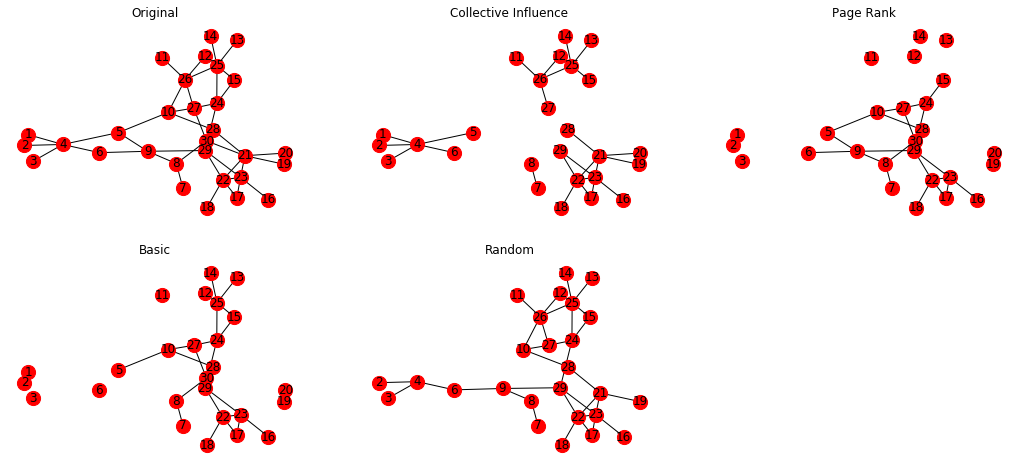

In [24]:
# PLOT GRAPHS AND GET GRAPH INFO FOR EACH DESTRUCTION
# Variables you can change:
    # extra=True/False - to calculate the Avg. Short Path & Clustering
    # plot=True/False - to plot the destroyed networks
results = display_dests(network_dests, network_pos, \
                        extra=True ,plot=True, with_labels=True, \
                        node_color='red', node_size=200, \
                        edge_color='black')

In [25]:
# DISPLAY THE GRAPH INFO IN TABLE FORMAT (MARKDOWN)
display(Markdown(results))

| Method | # Nodes | # Edges | # Sub-Graphs | Max # Nodes in Sub-Graph | Mean # Nodes Sub-Graphs | STD Nodes Sub-Graphs | Avg. Short Path | Avg. Clustering |
|---|---|---|---|---|---|---|---|---|
|Original|30|42|1|30|30.0|0.0|3.41609|0.25667|
|Collective Influence|26|27|4|10|6.5|2.96|2.07143|0.26538|
|Page Rank|26|22|8|17|3.25|5.21|2.95588|0.07051|
|Basic|26|22|7|18|3.71|5.85|3.49673|0.12821|
|Random|26|32|1|26|26.0|0.0|3.76923|0.15256|


## Airports Network
<u>__WARNING: COMPUTATIONALLY INTENSIVE!!!__</u>  

__8.3 Airports Network__ ... contains the necessary code for:  
    - reading in the airport routes dataset [3]  
    - reading in the airport lat/long position dataset [4]  
    - applying the destructions on the network  
    - plotting each destroyed network  
    - generating graph information on each destroyed network  

In [10]:
"""
DESCRIPTION: reads data file and creates a position map based on long/lat
INPUT: filename
OUTPUT: dictionary of long/lat arrays
"""
def read_airport_pos(filename):
    # col 4 contains the three letter code, 
    # col 6 contains the lat, 
    # col 7 contains the long
    array = np.loadtxt(filename, delimiter=",", usecols=(4, 6, 7), \
                       dtype=str, encoding="utf8") 
    pos = {}
    for row in array:
        if re.compile("\w{3}").fullmatch(row[0].replace('"', '')) != None: 
            # filter out "dirty data" and ports with no three letter code
            pos[row[0].replace('"', '')] = (float(row[2]), float(row[1]))
    return pos

"""
DESCRIPTION: reads data file and creates an undirected graph of airplane routes
INPUT: filename, pos = position map generated above
OUTPUT: Undirected graph 
"""
def read_routes(filename, pos):
    G = nx.Graph() # initiate networkx graph "G"
    # col 2 is the Source airport, col 4 is the destination
    array = np.loadtxt(filename, delimiter=",", usecols=(2, 4), \
                       dtype=np.unicode_) 
    # swap source/dest to be alphabetised instead
    array = np.array(list(map(lambda row: sorted(row), array)))
    # remove duplicates (this is why we alphabetised)
    array = np.unique(array, axis=0) 
    # make sure both source/dest exist in the pos map
    array = np.array(list(filter(lambda row: \
                                 row[0] in pos and row[1] in pos, array))) 
    # iterates through the data and makes edges for the graph
    G.add_edges_from(array) 
    return G

In [11]:
# CREATES A POSITION MAP FOR NX.DRAW FROM THE AIRPORTS CSV FILE
air_pos = read_airport_pos('airports.dat.csv') 

# CREATES A GRAPH FROM THE ROUTES CSV FILE
route_net = read_routes('routes.dat.csv', air_pos) 

In [12]:
# APPLY DESTRUCTIONS TO THE NETWORK
# CHANGING THE VARIABLES BELOW ARE NOT RECOMMENDED!
# Variables you can change:
    # num=int - the number of nodes to destroy
    # dist=int - the collective influence distance value
route_dests = destructions(route_net, num=10, dist=2)

allNodeCIs - These nodes will be removed:
0 : node: IST , value = 4423590
1 : node: ATL , value = 4122360
2 : node: ORD , value = 4019598
3 : node: DME , value = 3835506
4 : node: CDG , value = 3704700
5 : node: AMS , value = 3657600
6 : node: FRA , value = 3578345
7 : node: PEK , value = 3478683
8 : node: DXB , value = 3331671
9 : node: MUC , value = 2957580
pagerank - These nodes will be removed:
0 : node: ATL , value = 0.0048410376573213105
1 : node: DFW , value = 0.004612474989146137
2 : node: ORD , value = 0.004757963305087533
3 : node: DEN , value = 0.004652591433414408
4 : node: IST , value = 0.004614392152715834
5 : node: DME , value = 0.004331035728433254
6 : node: CDG , value = 0.004317895157494186
7 : node: AMS , value = 0.004288145807441392
8 : node: FRA , value = 0.004265523641955446
9 : node: IAH , value = 0.00425952411466277
basic_rank - These nodes will be removed:
0 : node: AMS , value = 245
1 : node: FRA , value = 241
2 : node: CDG , value = 235
3 : node: IST , value 

- _Note(1): Avg. Short Path & Avg. Clustering metrics are turned <u>on</u> by default:_
    - _On: extra=True_
    - _Off: extra=False_
- _Note(2): plotting the destroyed networks is turned <u>on</u> by defualt:_
    - _On: plot=True_
    - _Off: plot=False_

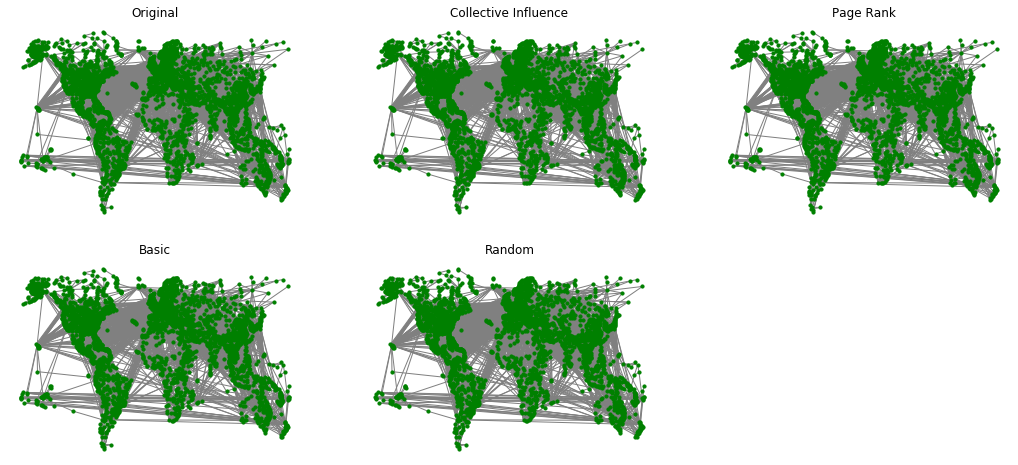

In [13]:
# PLOT GRAPHS AND GET GRAPH INFO FOR EACH DESTRUCTION
# Variables you can change:
    # extra=True/False - to calculate the Avg. Short Path & Clustering
    # plot=True/False - to plot the destroyed networks
results = display_dests(route_dests, air_pos, extra=True, plot=True)

In [14]:
# DISPLAY THE GRAPH INFO IN TABLE FORMAT (MARKDOWN)
display(Markdown(results))

| Method | # Nodes | # Edges | # Sub-Graphs | Max # Nodes in Sub-Graph | Mean # Nodes Sub-Graphs | STD Nodes Sub-Graphs | Avg. Short Path | Avg. Clustering |
|---|---|---|---|---|---|---|---|---|
|Original|3201|18548|8|3172|400.12|1047.67|3.96692|0.48683|
|Collective Influence|3191|16448|43|3124|74.21|470.6|4.11599|0.46728|
|Page Rank|3191|16493|82|3084|38.91|338.34|4.08735|0.45956|
|Basic|3191|16442|57|3112|55.98|408.38|4.09727|0.46452|
|Random|3191|18512|9|3160|354.56|991.88|3.96619|0.48504|


## Protein-Protein Interaction Network 
<u>__WARNING: EXTREMELY COMPUTATIONALLY INTENSIVE!!!__</u>  

__8.4 Protein-Protein Network__ ... contains the necessary code for:  
    - reading in the protein-protein interaction dataset [5]  
    - applying the destructions on the network  
    - plotting each destroyed network  
    - generating graph information on each destroyed network  

In [15]:
"""
DESCRIPTION: reads data file and creates an undirected graph of
    protein-protein interactions
INPUT: filename
OUTPUT: Undirected graph 
"""
def read_proteins(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, delimiter=",", usecols=(0, 1), dtype=np.unicode_)
    G.add_edges_from(array)
    return G

In [16]:
# CREATES A GRAPH FROM THE PROTEIN-PROTEIN DATASET FILE
PP = read_proteins('PP-Pathways_ppi.csv.gz')

In [17]:
# APPLY DESTRUCTIONS TO THE NETWORK
# CHANGING THE VARIABLES BELOW ARE NOT RECOMMENDED!
# Variables you can change:
    # num=int - the number of nodes to destroy
    # dist=int - the collective influence distance value
PP_dests = destructions(PP, num=2, dist=2)

allNodeCIs - These nodes will be removed:
0 : node: 351 , value = 1115947163
1 : node: 1994 , value = 923775530
pagerank - These nodes will be removed:
0 : node: 7316 , value = 0.00631307780733965
1 : node: 9515 , value = 0.006336914088375225
basic_rank - These nodes will be removed:
0 : node: 351 , value = 2132
1 : node: 4914 , value = 1965
random_rank - These nodes will be removed:
0 : node: 20683 , value = 215567
1 : node: 64284 , value = 215553


- _Note(1): Avg. Short Path & Avg. Clustering metrics are turned <u>off</u> by default:_
    - _On: extra=True_
    - _Off: extra=False_
- _Note(2): plotting the destroyed networks is turned <u>off</u> by defualt:_
    - _On: plot=True_
    - _Off: plot=False_

In [18]:
# GET GRAPH INFO FOR EACH DESTRUCTION
# DON'T PLOT THIS NETWORK, TOO BIG!
# DON'T GENERATE EXTRA CALCS, TOO INTENSIVE!
results = display_dests(PP_dests, pos=None, extra=False, plot=False)

In [19]:
# DISPLAY THE GRAPH INFO IN TABLE FORMAT (MARKDOWN)
display(Markdown(results))

| Method | # Nodes | # Edges | # Sub-Graphs | Max # Nodes in Sub-Graph | Mean # Nodes Sub-Graphs | STD Nodes Sub-Graphs | Avg. Short Path | Avg. Clustering |
|---|---|---|---|---|---|---|---|---|
|Original|21557|342353|26|21521|829.12|4138.38|N/A|N/A|
|Collective Influence|21555|338357|176|21369|122.47|1606.09|N/A|N/A|
|Page Rank|21555|340459|760|20785|28.36|753.42|N/A|N/A|
|Basic|21555|338258|124|21421|173.83|1915.79|N/A|N/A|
|Random|21555|342329|26|21519|829.04|4137.99|N/A|N/A|


# References

1. Kov ́acs, I. & Barab ́asi, A. Network science: Destruction perfected. Nature 524, 38 (2015).  
2. Morone, F. & Makse, H.  Influence maximization in complex networks through optimal perco-lation. Nature 524, 65 (2015).  
3. Patokallio, J. Open Flights Routes Dataset. https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat (2017). [Online; accessed 28-April-2019].  
4. Patokallio,  J. Open  Flights  Airports  Dataset. https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat (2018).  [Online; accessed 28-April-2019].  
5. Leskovec, J. Human protein-protein interaction network. http://snap.stanford.edu/biodata/datasets/10000/10000-PP-Pathways.html (2018).  [Online; accessed 16-May-2019].  
6. Brin, S. & Page, L.  The anatomy of a large-scale hypertextual web search engine. Computer networks and ISDN systems 30, 107–117 (1998).  
7. Freeman, L. Centrality in social networks conceptual clarification. Social networks 1, 215–239 (1978).  
8. Kijas,  J.Defining  Epistasis. https://www.nature.com/scitable/content/defining-epistasis-25690 (2004). [Online; accessed 23-May-2019].  